# Fundamentos de la Ciencia de Datos - Cursada 2024 - Práctico Especial

## Participantes 
- **Puggioni Bruno - bruno.puggioni@gmail.com - 44838933**
- **Saide Felipe - fsaide58@gmail.com - 44561355**

# 1.Importacion de las librerias

In [2]:
import pandas as pd
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
from os import path
from scipy.stats import shapiro, spearmanr, kruskal

# 2. Lectura del dataset

In [3]:
covers_df = pd.read_csv("Covers.csv")
covers_df.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Babe,Styx,3:38,4,0.700,0.582,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,96,1980
1,The Rose,Bette Midler,4:04,4,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,92,1980
2,Cars,Gary Numan,4:08,4,0.338,0.562,9,-7.181,1,0.0290,0.03900,0.000000,0.1070,0.259,149.907,82,1980
3,Magic,Olivia Newton-John,2:17,4,0.911,0.689,1,-6.176,1,0.2650,0.00119,0.000000,0.0704,0.546,140.034,80,1980
4,We Don’t Talk Anymore,Cliff Richard,3:37,4,0.728,0.563,1,-8.053,0,0.1340,0.62100,0.000000,0.1790,0.352,100.017,80,1980


- **Danceability, Energy, Acousticness, Liveness, Loudness, Tempo, Popularity**: Están relacionadas con las **características musicales**.
- **Duration, Time_Signature, Key, Mode, Speechiness, Instrumentalness, Valence**: Tienen que ver con la **estructura y características adicionales de la canción.**

# 3. Exploracion y limpieza de datos

## Valores nulos

In [4]:
covers_df.isnull().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

**Podemos notar que <span style="color: yellow">no hay valores nulos practicamente</span>**

## Duplicados

In [5]:
covers_df.duplicated().sum()
duplicates = covers_df[covers_df.duplicated()]
duplicates

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
589,Sugar Walls,Sheena Easton,2:03,4,0.634,0.526,1,-10.281,0,0.0531,0.612,0.0102,0.127,0.729,86.78,43,1985


In [6]:
covers_df.dtypes

Track                object
Artist               object
Duration             object
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Year                  int64
dtype: object

**El resultado nos indica que tenemos 1 fila duplicada, por lo que procederemos a eliminarla**

In [7]:
covers_df = covers_df.drop_duplicates()

## Analisis estadistico de los datos

**La gran mayoría de las columnas representan diferentes tipos de números (int, float)**, aunque algunas, como duration, son de tipo objeto pero representan valores numéricos en minutos y segundos.
**Esto nos facilitará mucho el análisis estadístico**, junto con la aplicación de modelos matemáticos, simplificando también la detección de valores atípicos y visualización de datos.

In [8]:
covers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 997
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             997 non-null    object 
 1   Artist            997 non-null    object 
 2   Duration          997 non-null    object 
 3   Time_Signature    997 non-null    int64  
 4   Danceability      997 non-null    float64
 5   Energy            997 non-null    float64
 6   Key               997 non-null    int64  
 7   Loudness          997 non-null    float64
 8   Mode              997 non-null    int64  
 9   Speechiness       997 non-null    float64
 10  Acousticness      997 non-null    float64
 11  Instrumentalness  997 non-null    float64
 12  Liveness          997 non-null    float64
 13  Valence           997 non-null    float64
 14  Tempo             997 non-null    float64
 15  Popularity        997 non-null    int64  
 16  Year              997 non-null    int64  
dtypes:

El conteo de datos (count) nos indica que no hay valores nulos practicamente.Sin embargo **la ausencia de valores nulos no garantiza que no haya valores incorrectos u otras representaciones de datos inválidos**<br>

In [9]:
covers_df.describe()

,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,3.966901,0.626461,0.633470,5.229689,-8.884724,0.690070,0.057635,0.244258,0.042586,0.178669,0.602973,120.938401,57.758275,1984.498495
std,0.228290,0.151593,0.203861,3.656759,3.831563,0.462696,0.055768,0.248486,0.157133,0.162722,0.257973,26.245862,17.399648,2.874770
min,1.000000,0.174000,0.018300,0.000000,-28.980000,0.000000,0.022700,0.000003,0.000000,0.022300,0.028700,61.530000,0.000000,1980.000000
25%,4.000000,0.534000,0.489000,2.000000,-11.262000,0.000000,0.031700,0.043300,0.000000,0.083900,0.388000,102.477000,49.000000,1982.000000
50%,4.000000,0.633000,0.652000,5.000000,-8.269000,1.000000,0.039300,0.155000,0.000022,0.113000,0.644000,119.972000,60.000000,1984.000000
75%,4.000000,0.735000,0.797000,9.000000,-6.042000,1.000000,0.056500,0.385000,0.001380,0.226000,0.825000,135.003000,70.000000,1987.000000
max,5.000000,0.988000,0.994000,11.000000,-1.496000,1.000000,0.524000,0.996000,0.974000,0.981000,0.984000,208.571000,96.000000,1989.000000


## Reporte de los datos

In [10]:
import webbrowser
import os
report = pp.ProfileReport(covers_df)
if not path.exists("covers_report.html"):
    report.to_file(output_file="covers_report.html")
else:
    print("Reporte ya descargado")
output_file = "covers_report.html"
report.to_file(output_file=output_file)

if os.path.exists(output_file):
    webbrowser.open(output_file)
else:
    print("Error al generar el informe.")

Reporte ya descargado


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Histograma de los datos

Este resumen de los histogramas de cada variable permite observar y analizar su comportamiento, facilitando la formulación de hipótesis que pueden conducir tanto a conclusiones como a decisiones informadas

In [11]:
import matplotlib.pyplot as plt

# Establecer el estilo
plt.style.use('default')

# Crear el histograma
n_cols = 2  # Número de columnas
n_rows = (len(covers_df.columns) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Crear el histograma
ax = covers_df.hist(figsize=(12, 30), alpha=1, layout=(n_rows, n_cols))

# Ajustar el diseño y agregar un título
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.suptitle('Histograma de los datos', fontsize=38)


# Mostrar el gráfico
plt.show()


C:\Users\fsaid\AppData\Local\Temp\ipykernel_8216\1173718057.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


<details>
  <summary>Observaciones detalladas</summary>

#### Time Signature:
<span style="color: yellow;">**La mayoría de las canciones tienen una métrica de 4**</span>, lo cual es común en la música popular.una métrica de 4 indica que la canción tiene una estructura rítmica regular que es fácil de seguir, lo que la hace accesible y popular en muchos estilos musicales.

#### Danceability:
La distribución muestra una tendencia casi simétrica , aunque <span style="color: yellow;">**se inclina ligeramente hacia la mayor bailabilidad de las canciones**</span>, sugiriendo que muchas de ellas son más **adecuadas para bailar**

#### Energy:
La energía de las canciones con una <span style="color: yellow;">**concentración de canciones en el rango de 0.6 a 0.9**</span> nos indica que hay **una buena cantidad de canciones que una energia mas que moderada**

#### Key:
<span style="color: yellow;">**La tonalidad tiene una distribución desigual**</span>. Aunque en algunas tonalidades hay un descenso, en otras se observa un patrón de subidas y bajadas. Sin embargo, la tonalidad 0 destaca significativamente sobre las demás. **Tener en cuenta que la tonalidad 0 es mas "optimista" o "alegre" causando que las canciones busquen generar un estado similar en los oyentes.**

#### Loudness:
La mayoría de las canciones tienen un volumen promedio que <span style="color: yellow;">**tiende a estar entre -15 y -5 dB**</span>, lo que **sugiere que poseen un volumen relativamente alto.** Esta característica puede asociarse al **patrón de 'alegría'** que se ha encontrado en las canciones hasta ahora.

#### Mode:
<span style="color: yellow;">**La mayoría de las canciones están en tono mayor**</span>, lo que puede estar relacionado con la **tendencia de crear música más alegre y optimista** en los años 80. Sin embargo, la <span style="color: yellow;">**ausencia de valores en los rangos intermedios indica una fuerte polarización de los estilos musicales**</span>, pasando de un polo a otro totalmente opuesto.

#### Speechiness:
La <span style="color: yellow;">**mayoría de las canciones tienen un bajo contenido de palabras habladas**</span>, lo que es típico en las grabaciones musicales, ya que las canciones son predominantemente melódicas.

#### Acousticness:
La <span style="color: yellow;">**acústica de las canciones muestra una baja proporción**</span>, indicando que la **mayoría de las canciones de este conjunto son más electrónicas o producidas con instrumentos amplificados.**

#### Instrumentalness:
<span style="color: yellow;">**La mayoría de las canciones tienen poca o ninguna instrumentalidad**</span>, lo que sugiere que la mayoría incluyen voces.

#### Liveness:
<span style="color: yellow;">**La mayoría de las canciones tienen una baja probabilidad de haber sido grabadas en vivo**</span>, lo que puede reflejar la producción de estudio típica de la época.

#### Valence:
<span style="color: yellow;">**La valencia de las canciones indica que muchas tienen un tono positivo**</span>, lo que puede ser un reflejo del optimismo en la música de esa década.

#### Tempo:
La velocidad de las canciones tiene una distribución que se <span style="color: yellow;">**concentra entre 80 y 120 BPM**</span>, lo que es típico para canciones de **baile y pop.**

#### Popularity:
La popularidad de las canciones muestra una <span style="color: yellow;">**concentración en el rango medio, quizas un poco mas**</span>, sugiriendo que hay un **número considerable de canciones que alcanzaron niveles de popularidad**, pero también hay muchas que no fueron tan populares.

#### Year:
Este histograma solo confirma que las canciones son de la <span style="color: yellow;">**decada del 80'**</span>

Antes de continuar, me gustaria corregir lo que a simple vista pareciera ser un error, aunque no esta demas explicarlo para un mejor entendimiento de los datos.
Pareciera que en el mismo se sugiere una contradicción: las canciones tenían poca instrumentalidad (lo que podría parecer que indican más voces) y poco "Speechiness" (sugiriendo menos voces). Sin embargo, esto se explica por el hecho de que **el bajo contenido de "habla" no indica la ausencia de voces, sino que estas se utilizaban de una forma más melódica, predominando las melodías cantadas sobre el contenido hablado**
</details>

## Boxplot de los datos

In [12]:
def plot_boxplots(df):
    numerica_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Definir el número de columnas en el grid
    ncols = 2  # numero columas
    nrows = (len(numerica_cols) + ncols - 1) // ncols  # Calcular filas necesarias
    
    # Crear la figura y los ejes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6 * nrows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para un acceso más fácil

    # Crear un boxplot para cada columna numérica
    for i, column in enumerate(numerica_cols):
        sns.boxplot(y=df[column], ax=axes[i], fliersize=5)  # Cambiar x a y
        axes[i].set_title(f'Boxplot de {column}', fontsize=20, color='black')  # Cambiar color del título
        axes[i].set_ylabel(column, fontsize=16, color='black')  # Cambiar color de la etiqueta Y
        axes[i].set_xlabel('Valores', fontsize=16, color='black')  # Cambiar color de la etiqueta X
        axes[i].grid(axis='x', linestyle='-', alpha=0.5, color='black')  # Eje horizontal
        axes[i].grid(axis='y', linestyle='-', alpha=0)  # Desactivar la cuadrícula vertical

    # Eliminar ejes vacíos si hay menos columnas que espacios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el layout y agregar un título general
    plt.suptitle('Boxplot de los datos', fontsize=36, color='black', y=1.04)  # Cambiar color del título general
    plt.tight_layout(rect=[0, 0, 1, 1.03]) 
    plt.show()

# mostrar los boxplots
plot_boxplots(covers_df)


C:\Users\fsaid\AppData\Local\Temp\ipykernel_8216\3997770041.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


Como se puede observar, algunos de los boxplots presentan outliers. Estos valores no son necesariamente datos irreales, sino que representan situaciones poco comunes en el conjunto de datos, por lo que no nos vemos en la necesidad de realizar una limpieza de outliers.

## Correlaciones

In [13]:
# mostrar todas las filas
pd.set_option('display.max_rows', None)
# columnas numéricas
numerica_df = covers_df.select_dtypes(include=['float64', 'int64'])

# correlaciones
tabla_correlaciones = numerica_df.corr().unstack().drop_duplicates().sort_values(ascending=False)
tabla_correlaciones = tabla_correlaciones[tabla_correlaciones != 1]
tabla_correlaciones = tabla_correlaciones[tabla_correlaciones.abs() > 0.5]

# estilo
tabla_correlaciones_df = pd.DataFrame(tabla_correlaciones, columns=['Correlaciones'])
estilo_tabla = tabla_correlaciones_df.style.background_gradient(cmap='coolwarm').format("{:.2f}")
estilo_tabla


,,Correlaciones
Energy,Loudness,0.70
Danceability,Valence,0.53
Energy,Acousticness,-0.60


## Graficos de dispersion

In [1]:
%matplotlib inline
sns.scatterplot(data = covers_df, x='Energy', y='Loudness', hue='Acousticness', palette='plasma', alpha=1)

# diseño
plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Energy versus Loudness', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()


NameError: name 'sns' is not defined

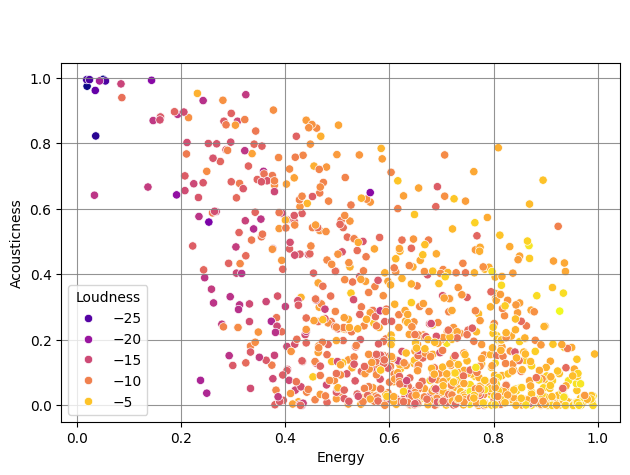

In [15]:
%matplotlib inline
sns.scatterplot(data = covers_df, x='Energy', y='Acousticness', hue='Loudness', palette='plasma', alpha=1)

# diseño
plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Energy versus Acoustiness', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()

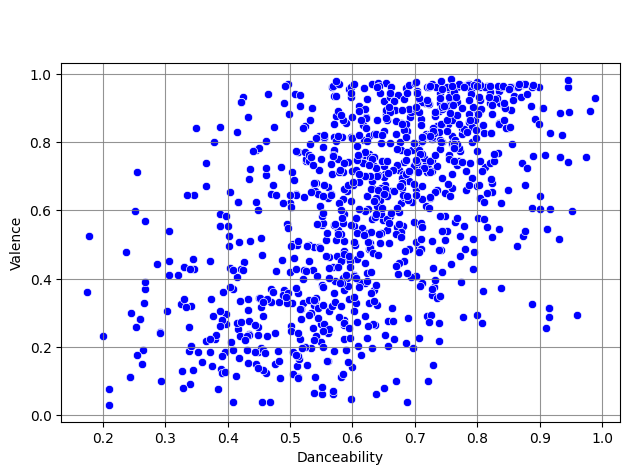

In [16]:
%matplotlib inline
sns.scatterplot(data = covers_df, x='Danceability', y='Valence', color='blue', alpha=1)

# diseño
plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Danceability versus Valence', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()

# 4. formulaciones de Hipotesis en base a la lectura de datos



#### <span style="color: yellow">¿Influyen factores como la energía, la bailabilidad, la acústica o la tonalidad en la popularidad de las canciones?</span>
Se sabe que las canciones más populares de las décadas pasadas compartían ciertas característica.Este análisis permitiría entender si las canciones que eran exitosas en los 80 compartían una combinación específica de factores musicales que favorecían su éxito.

#### <span style="color: yellow">¿La duración de la canción está relacionada con su popularidad?</span>
La duración de las canciones ha sido un tema recurrente en la industria musical, especialmente en la relación con su popularidad. Este estudio podría revelar si la duración es un factor relevante para el éxito de las canciones en ese periodo

#### <span style="color: yellow">¿El tono de la cancion esta determinado por su intensidad(Energy)?</span>
Esta hipótesis propone investigar si realmente la intensidad de la canción (energía) está vinculada directamente con el tono 

#### <span style="color: yellow">¿A medida que avanzan los años, las canciones tienden a ser menos acústicas?</span>
Esta hipótesis explora si en los años 80, a medida que los avances en la producción musical se hicieron más accesibles, las canciones fueron perdiendo su carácter acústico, adoptando sonidos más amplificados y electrónicos. Gracias a los datos vamos a poder determinar si la acustica disminuye con el tiempo pero no si esto se debe especificamente a la evolucion de la tecnologia.

#### <span style="color: yellow">¿El tempo influye en la bailabilidad y la energía de las canciones?</span>
El ritmo rápido a menudo está relacionado con una mayor energía y una mayor capacidad para mover al público. Esta hipótesis explora si existe una relación clara entre el tempo de las canciones de los 80 y su capacidad de ser percibidas como enérgicas y bailables

#### <span style="color: yellow">¿Que una cancion sea energetica es indicativo de ser ruidosa tambien?</span>
La correlacion nos plantea fuertemente una relacion entre estas 2 variables (0.7), indicandonos que es probable que la energia de una cancion este determinada por ser ruidosa o viceversa, lo que habria que corroborar con el planteamiento y demostracion de una hipotesis


# 5. Validaciones de hipotesis

## HIPOTESIS 1 : La energia de una cancion esta determinada por cuan ruidosa es

Debemos indagar si cumple con las condiciones para un test parametrico

**¿Ambas variables cumplen las condiciones para poder realizar sobre ellos un test parametrico?**

debemos comprobar :
- <span style="color: red">**Normalidad (no cumplen)**</span>
- <span style="color: red">**Homocedasticidad (no cumplen)**</span>
- <span style="color: green">**Los datos deben estar en una escala de intervalo o razon (cumple)**</span>
- <span style="color: green">**Debe tener un tamaño de muestra mayor a 30 (cumple)**</span>

In [17]:
columnas_a_probar = ['Energy', 'Loudness']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal (p > 0.05).")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).")
    print("")

# Ajustar un modelo de regresión lineal (Energy var independiente Loudness var dependiente)
X = covers_df['Energy']
y = covers_df['Loudness']

# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo OLS (regresión lineal)
model = sm.OLS(y, X)
results = model.fit()

# Calcular los residuos y valores predichos
residuos = results.resid
valores_predichos = results.fittedvalues

# Realizar la prueba de Breusch-Pagan para homoscedasticidad
test = sms.het_breuschpagan(residuos, X)
bp_value, bp_p_value, _, _ = test

# Mostrar el resultado de la prueba de Breusch-Pagan
print(f"Valor p de la prueba de Breusch-Pagan: {bp_p_value}")
if bp_p_value > 0.05:
    print("Las variables presentan homocedasticidad (valor p > 0.05).")
else:
    print("Las variables no presentan homocedasticidad (valor p <= 0.05).")


Resultados para Energy:
Estadístico de Shapiro-Wilk: 0.9763257341628986
Valor p: 1.1368702862330844e-11
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).

Resultados para Loudness:
Estadístico de Shapiro-Wilk: 0.9372041406305728
Valor p: 4.404874622904805e-20
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).

Valor p de la prueba de Breusch-Pagan: 1.0331126902199712e-16
Las variables no presentan homocedasticidad (valor p <= 0.05).


Dado que no cumplen con algunas de las condiciones para realizar un test parametrico, vamos a tener que <span style="color: yellow">**optar por aquellos no parametricos**</span>, para poder afirmar que dos variables tienen una relacion vamos a usar el <span style="color: yellow">**test de correlacion de spearman**</span> para determinar si hay una correlacion significativa de los datos. Este test, a diferencia de otros no hace suposiciones sobre la distribucion de los datos o la naturaleza lineal de la relacion, cosa que viene bien para este conjunto de datos

In [18]:
#correlación de Spearman
correlation, p_value = spearmanr(covers_df['Energy'], covers_df['Loudness'])

print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay una correlación significativa entre Energy y Loudness (p < 0.05).")
else:
    print("No hay una correlación significativa entre Energy y Loudness (p >= 0.05).")
print("")


Coeficiente de correlación de Spearman: 0.6730329721322253
Valor p: 1.71225047449533e-132
Hay una correlación significativa entre Energy y Loudness (p < 0.05).



Este valor indica una **<span style = "color: yellow"> correlación positiva moderada a fuerte entre las variables Energy y Loudness.</span>** A medida que la energía de una canción aumenta, también tiende a aumentar el nivel de loudness, y viceversa.La correlación observada es estadísticamente significativa, lo que sugiere que <span style="color: yellow">**la relación no es producto del azar.**</span> Ademas del  test de correlacion de spearman, para seguir afianzando con certeza la hipotesis vamos a utilizar el **test de Kendall Tau**.

In [19]:
from scipy.stats import kendalltau

tau, p_value = kendalltau(covers_df['Energy'], covers_df['Loudness'])

print(f"Estadístico de Kendall Tau: {tau}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula: existe una correlación monotónica significativa.")
else:
    print("No se rechaza la hipótesis nula: no existe una correlación monotónica significativa.")


Estadístico de Kendall Tau: 0.4851931008098515
Valor p: 2.8533845126265116e-116
Se rechaza la hipótesis nula: existe una correlación monotónica significativa.


Atravez del uso de 2 test no parametricos distintos hemos llegado a la misma conclusion, estas 2 variables **tienen una relacion que no es producto del azar**, por lo que podemos afirmar con cierta certeza que **<span style = "color: yellow">la energia afecta a la intensidad de las canciones.</span>**

### CONCLUSION 

A través de la visualización de datos, el cálculo del nivel de correlación y los tests realizados, podemos concluir que la hipótesis de que <span style="color: yellow">**la energía esta determinada por la ruidosidad de una canción**</span> es verdadera. La ruidosidad suele expresar mayor "movimiento", "alegría" o, en general, un carácter "más energético". Esto es evidente en muchas de las canciones que acostumbramos bailar hoy en día. En contraste, las canciones de tonos más bajos suelen utilizarse en contextos diferentes, no tanto para bailar o realizar actividades intensamente energéticas.<br>
Al presentar el top 5 de las canciones mas ruidosas estimo que sin necesidad de un análisis técnico profundo, el público percibira de manera intuitiva cómo estas cualidades influyen en el carácter bailable y memorable de las canciones más enérgicas de esa década al reconocer de que canciones estamos hablando. Y que lo mismo pasara con aquellas canciones mas energicas

In [20]:
print('')
print('TOP 5 mas ruidosas')
top_5_ruidosas = covers_df.sort_values(by='Loudness', ascending=False).head(5)
top_5_ruidosas[['Track', 'Artist', 'Loudness', 'Energy', 'Popularity']]


TOP 5 mas ruidosas


,Track,Artist,Loudness,Energy,Popularity
527,Axel F,Harold Faltermeyer,-1.496,0.927,70
749,Victory,Kool & the Gang,-2.209,0.755,61
614,King For A Day,Thompson Twins,-2.238,0.965,76
810,Girlfriend,Pebbles,-2.433,0.959,75
53,One Fine Day,Carole King,-2.685,0.868,58


In [21]:
print('')
print('TOP 5 mas energicas')
top_5_energicas = covers_df.sort_values(by='Energy', ascending=False).head(5)
top_5_energicas[['Track', 'Artist', 'Energy', 'Loudness', 'Popularity']]


TOP 5 mas energicas


,Track,Artist,Energy,Loudness,Popularity
252,We Got The Beat,The Go-Go’s,0.994,-5.610,58
377,Goody Two-Shoes,Adam Ant,0.991,-3.467,51
743,Land Of Confusion,Genesis,0.991,-3.703,62
430,When Doves Cry,Prince,0.989,-4.613,68
821,Tell It To My Heart,Taylor Dayne,0.988,-5.042,67


Como podemos ver, en ambos rankings se presentan canciones con una popularidad que varía de moderada a alta, siendo en su mayoría bastante populares. Si escuchamos con atención, podemos notar que las canciones del top 5 más ruidosas también son bastante enérgicas, y lo mismo sucede en sentido contrario. La canción menos enérgica tiene un valor de 0.755, mientras que la menos ruidosa alcanza -5.610, lo que indica que incluso los niveles más bajos siguen siendo bastante altos.

## HIPOTESIS 2 : La acusticidad disminuye a medida que avanza el tiempo

Como primera instancia, validaremos las condiciones para realizar un test parametrico

**¿Ambas variables cumplen las condiciones para poder realizar sobre ellos un test parametrico?**

debemos comprobar :
- <span style="color: red">**Normalidad (no cumplem)**</span>
- <span style="color: green">**Homocedasticidad (cumple)**</span>
- <span style="color: green">**Los datos deben estar en una escala de intervalo o razon (cumple)**</span>
- <span style="color: green">**Debe tener un tamaño de muestra mayor a 30 (cumple)**</span>

In [22]:
columnas_a_probar = ['Acousticness', 'Year']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal.(p > 0.05) ")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)")
    print("")
    
# Year var independiente Acousticness var dependiente - Regresion lineal para el calculo de homocedasticidad
X = covers_df['Year']
y = covers_df['Acousticness']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Calcular los residuos y valores predichos
residuos = results.resid
valores_predichos = results.fittedvalues

# prueba de Breusch-Pagan para homoscedasticidad
test = sms.het_breuschpagan(residuos, X)
bp_value, bp_p_value, _, _ = test

# Resultado
print(f"Valor p de la prueba de Breusch-Pagan: {bp_p_value}")
if bp_p_value > 0.05:
    print("Las variables presentan homocedasticidad (valor p > 0.05).")
else:
    print("Las variables no presentan homocedasticidad (valor p <= 0.05).")


Resultados para Acousticness:
Estadístico de Shapiro-Wilk: 0.8540268771500221
Valor p: 2.2462869574668397e-29
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Resultados para Year:
Estadístico de Shapiro-Wilk: 0.9352088574323394
Valor p: 2.152015422698957e-20
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Valor p de la prueba de Breusch-Pagan: 0.3348221292351378
Las variables presentan homocedasticidad (valor p > 0.05).


Dado que ninguna de las variables cumple en su totalidad las condiciones necesarias, nos vemos limitados al <span style="color: yellow">**uso de test no parametricos**</span>. Por lo tanto, emplearemos la <span style="color: yellow">**prueba de medianas de Kruskal-Wallis**</span> para determinar si hay cambios significativos a lo largo del tiempo.

In [23]:
# grupos divididos en años
grupos = [covers_df[covers_df['Year'] == year]['Acousticness'] for year in range(1980, 1990)]

# prueba de Kruskal-Wallis
statistic, p_value = kruskal(*grupos)

# resultados
print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p:", p_value)

#interpretacion de los resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas en las medianas entre los años.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas en las medianas entre los años.")


Estadístico de Kruskal-Wallis: 49.344927386212674
Valor p: 1.4300941413619882e-07
Se rechaza la hipótesis nula: hay diferencias significativas en las medianas entre los años.


Existen diferencias significativas en el promedio de la acústica a lo largo de los años. Ahora, para determinar si estas diferencias siguen un patrón lineal, utilizaremos el <span style="color: yellow">**modelo de regresión lineal OLS (Ordinary Least Squares)**</span>. Este enfoque nos permitirá <span style="color: yellow">**identificar factores clave que puedan explicar el comportamiento de la acústica en función del tiempo y capturar el patrón subyacente**</span>. Todo esto acompañado del grafico de regresion lineal para una mejor interpretacion de los datos. Para ello tambien se tuvo en cuenta que estos datos presentan homocedasticidad, lo cual nos permite hacer la regresion lineal

                            OLS Regression Results                            
Dep. Variable:           Acousticness   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     19.79
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           9.60e-06
Time:                        22:50:20   Log-Likelihood:                -16.172
No. Observations:                 997   AIC:                             36.34
Df Residuals:                     995   BIC:                             46.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2004      5.385      4.494      0.0

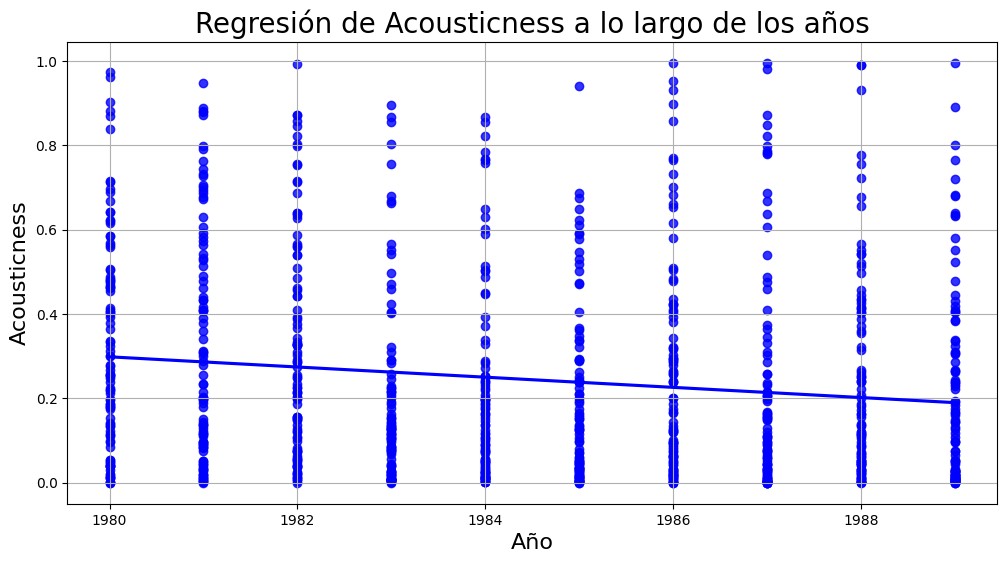

In [24]:
datos = covers_df[['Year', 'Acousticness']]

X = datos['Year']
y = datos['Acousticness']

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

#línea de regresión
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='Acousticness', data=datos, ci=None, color='blue')
plt.title('Regresión de Acousticness a lo largo de los años', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Acousticness', fontsize=16)
plt.grid()
plt.show()

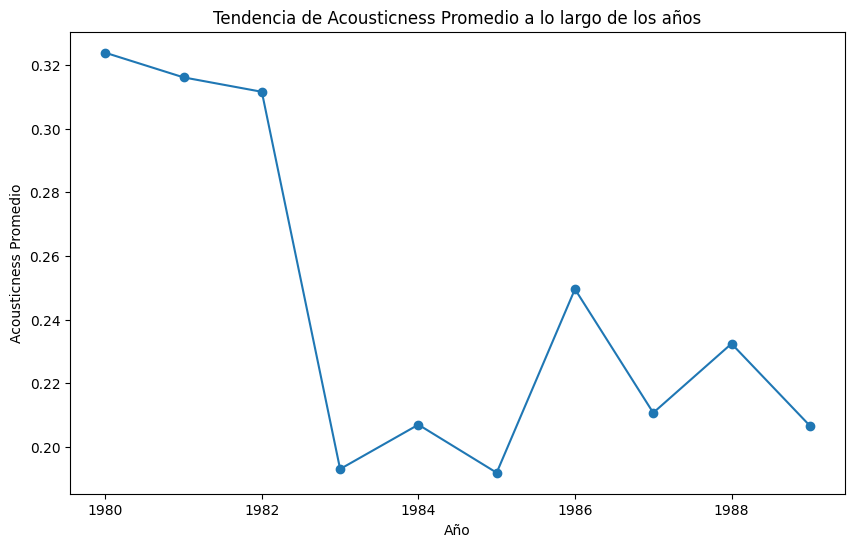

In [25]:
# Promedio de Acousticness por año
acousticness_mean_by_year = covers_df.groupby('Year')['Acousticness'].mean()

# Tendencia 
plt.figure(figsize=(10, 6))
plt.plot(acousticness_mean_by_year.index, acousticness_mean_by_year, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Acousticness Promedio')
plt.title('Tendencia de Acousticness Promedio a lo largo de los años')
plt.show()


<table style="border-collapse: collapse; width: 100%;">
  <tr style="background-color: #003366; color: #ffffff;">
    <th style="border: 1px solid black; padding: 8px;">Variable</th>
    <th style="border: 1px solid black; padding: 8px;">Valor</th>
  </tr>
  <tr style="background-color: #f5f5f5; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Dep. Variable</td>
    <td style="border: 1px solid black; padding: 8px;">Acousticness</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">R-squared</td>
    <td style="border: 1px solid black; padding: 8px;">0.020</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Adj. R-squared</td>
    <td style="border: 1px solid black; padding: 8px;">0.019</td>
  </tr>
  <tr style="background-color: #f5f5f5; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Method</td>
    <td style="border: 1px solid black; padding: 8px;">Least Squares</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">F-statistic</td>
    <td style="border: 1px solid black; padding: 8px;">19.79</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Prob (F-statistic)</td>
    <td style="border: 1px solid black; padding: 8px;">9.60e-06</td>
  </tr>
</table>

<table style="border-collapse: collapse; width: 100%;">
  <tr style="background-color: #003366; color: #ffffff;">
    <th style="border: 1px solid black; padding: 8px;">Variable</th>
    <th style="border: 1px solid black; padding: 8px;">Coeficiente (coef)</th>
    <th style="border: 1px solid black; padding: 8px;">Error Estándar (std err)</th>
    <th style="border: 1px solid black; padding: 8px;">Estadístico t (t)</th>
    <th style="border: 1px solid black; padding: 8px;">Valor p (P>|t|)</th>
    <th style="border: 1px solid black; padding: 8px;">Intervalo de Confianza [0.025, 0.975]</th>
  </tr>
  <tr style="background-color: #f5f5f5; color:#333333;">
    <td style="border: 1px solid black; padding: 8px;">Year</td>
    <td style="border: 1px solid black; padding: 8px;">-0.0121</td>
    <td style="border: 1px solid black; padding: 8px;">0.003</td>
    <td style="border: 1px solid black; padding: 8px;">-4.449</td>
    <td style="border: 1px solid black; padding: 8px;">0.000</td>
    <td style="border: 1px solid black; padding: 8px;">[-0.017, -0.007]</td>
  </tr>
</table>
<br>

<span style="color: yellow">**R-squared**</span> : Indica la proporción (en porcentaje) de variabilidad de la variable dependiente explicada por la variable independiente. En este caso, es de 2%, lo cual sugiere que la mayoría de la variabilidad en la acústica no se debe al año. Para mejorar el modelo, podría ser útil agregar más predictores que expliquen mejor la variabilidad de la acústica.

<span style="color: yellow">**Adj. R-squared**</span> : a diferencia del anterior este esta ajustado al numero de predictores, que nos ayudan a determinar aportan valor o util o no (disminuyendo si los predictores no aportan valor util). En este caso, dado que la diferencia es mínima, podemos concluir que los predictores utilizados están proporcionando información útil para el modelo, es decir, no aportan mucho pero dentro de lo que hay es el que mas aporta.
 
<span style="color: yellow">**F-statistic**</span> : Indica si el modelo explica una parte significativa de la variabilidad de la variable independiente, comparado con un modelo que no utiliza ningun predictor (modelo nulo). Un valor de 19.79 es relativamente alto, por lo que podriamos decir que hay una relacion significativa entre los predictores y la variable independiente

<span style="color: yellow">**prob(F-statistic)**</span> : Nos dice la probabilidad de obtener un valor tan o mas extremo que el F-statistic, trabaja bajo la hipotesis nula de que ningun predictor tiene una relacion significativa con la variable independiente. El valor de 9.60e-06 nos estaria diciendo que el modelo es significativo, es decir, al menos uno de los predictores tiene una relacion significativa con la variable dependiente

<span style="color: yellow">**Coef**</span> : Podemos observar que por cada año que pasa la acustica disminuye 0.0121

<span style="color: yellow">**std err**</span> : Esto nos marca el error estandar de cada coeficiente, lo que nos ayuda a medir la precision de las estimaciones. 0.003 es un valor notoriamente bajo, por lo que podriamos decir que es una estimacion confiable

<span style="color: yellow">**t**</span> : se obtiene al dividir el coeficiente entre su error estandar , esto sirve para evaluar si el coeficiente es significativamente diferente de 0, lo cual indicaria una significancia estadistica, como lo es en este caso

<span style="color: yellow">**p > |t|**</span> : nos indica la significancia estadistica del coeficiente, valores menores a 0.005 indican que es probable que exista una relacion entre la variable independiente (Year) y la variable dependiente(Acousticness), en este caso es tan bajo que al redondear da 0.000, asi que podriamos decir que existe una relacion bastante fuerte

<span style="color: yellow">**[0.025 0.975]**</span> : Es el intervalo de confianza del 95%, nos indica el rango donde es probable que caiga el valor verdadero del coeficiente, tiene sentido ya que el coeficiente es de -0.0121, por lo muestra una consistencia con el rango establecido de [-0.007 - -0.017]

**En resumen, el modelo muestra que hay una relación significativa entre Year y Acousticness pero la capacidad explicativa es baja, como lo muestra el R-cuadrado del 2%.**

### CONCLUSION

Aunque <span style="color: yellow">**se observa una ligera disminución en la acústica a medida que avanzan los años, este cambio no se debe exclusivamente al paso del tiempo**</span>, ya que el modelo muestra una relación débil y no captura otros factores que podrían influir más en la acústica de las canciones. Demostramos efectivamente que la acustica disminuye con el tiempo, pero no cual es el factor de esa disminucion

<span style="color: yellow">**La disminución de la acústica en la música de los años 80 puede atribuirse, a nuestro criterio, a la evolución tecnológica**</span> de esa década. Factores como la creciente popularidad del sintetizador, cajas de ritmo, MIDI y la influencia de géneros o artistas que usaban una menor acústica en sus canciones impulsaron a muchos músicos a adaptarse o imitar este cambio. Como resultado, se produjo una reducción en el uso de elementos acústicos en las producciones musicales de la época.

Fuentes : <br>
<a href="https://newhdmedia.com/es/El-desarrollo-de-la-m%C3%BAsica-electr%C3%B3nica-en-los-a%C3%B1os-80./">El desarrollo de la música electrónica en los años 80 - NewHDMedia</a><br>
<a href="https://generacionfenix.com/la-musica-de-los-anos-80-un-legado-sonoro-que-trasciende-generaciones/">La música de los años 80: un legado sonoro que trasciende generaciones - Generación Fénix</a><br>
<a href="https://sonicaworks.com/la-evolucion-de-midi-de-los-primeros-pasos-a-la-revolucion-digital/">La evolución de MIDI: de los primeros pasos a la revolución digital - SonicaWorks</a><br>


## HIPOTESIS 3 : El tempo influye en la bailabilidad y la energía de las canciones

Vamos a proceder a ver si cumples ciertas condiciones para un test parametrico

Condiciones : 
- <span style="color: red">**Normalidad (no cumplem)**</span>
- <span style="color: green">**Homocedasticidad (cumplen)**</span>
- <span style="color: green">**Los datos deben estar en una escala de intervalo o razon (cumple)**</span>
- <span style="color: green">**Debe tener un tamaño de muestra mayor a 30 (cumple)**</span>

In [26]:
columnas_a_probar = ['Tempo', 'Danceability', 'Energy']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal.(p > 0.05) ")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)")
    print("")

X = covers_df['Tempo']
y = covers_df['Energy']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Calcular los residuos y valores predichos
residuos = results.resid
valores_predichos = results.fittedvalues

# prueba de Breusch-Pagan para homoscedasticidad
test = sms.het_breuschpagan(residuos, X)
bp_value, bp_p_value, _, _ = test

# Resultado
print(f"Valor p de la prueba de Breusch-Pagan: {bp_p_value}")
if bp_p_value > 0.05:
    print("Las variables presentan homocedasticidad (valor p > 0.05).")
else:
    print("Las variables no presentan homocedasticidad (valor p <= 0.05).")
print()
X = covers_df['Tempo']
y = covers_df['Danceability']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Calcular los residuos y valores predichos
residuos = results.resid
valores_predichos = results.fittedvalues

# prueba de Breusch-Pagan para homoscedasticidad
test = sms.het_breuschpagan(residuos, X)
bp_value, bp_p_value, _, _ = test

# Resultado
print(f"Valor p de la prueba de Breusch-Pagan: {bp_p_value}")
if bp_p_value > 0.05:
    print("Las variables presentan homocedasticidad (valor p > 0.05).")
else:
    print("Las variables no presentan homocedasticidad (valor p <= 0.05).")



Resultados para Tempo:
Estadístico de Shapiro-Wilk: 0.9752910325811216
Valor p: 5.4839998897768906e-12
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Resultados para Danceability:
Estadístico de Shapiro-Wilk: 0.9912796411518856
Valor p: 1.2527523412551e-05
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Resultados para Energy:
Estadístico de Shapiro-Wilk: 0.9763257341628986
Valor p: 1.1368702862330844e-11
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Valor p de la prueba de Breusch-Pagan: 0.1652389123555576
Las variables presentan homocedasticidad (valor p > 0.05).

Valor p de la prueba de Breusch-Pagan: 0.35751568483366547
Las variables presentan homocedasticidad (valor p > 0.05).


Las variables no cumplen las condiciones necesarias para realizar un test parametrico, por ello recurriremos a las no parametricas

                            OLS Regression Results                            
Dep. Variable:                  Tempo   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     24.20
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           5.48e-11
Time:                        22:57:46   Log-Likelihood:                -4648.2
No. Observations:                 997   AIC:                             9302.
Df Residuals:                     994   BIC:                             9317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          129.9952      4.100     31.710   

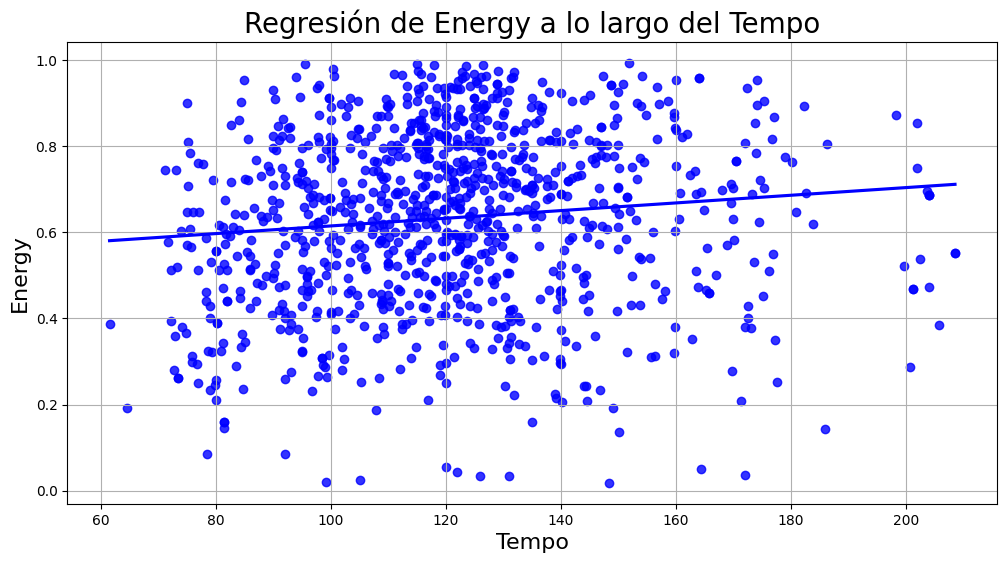

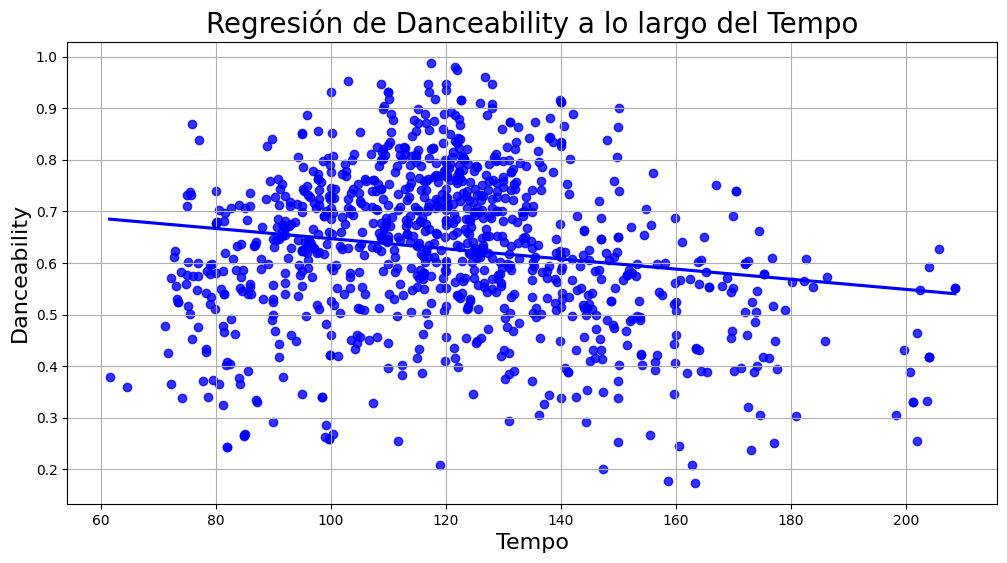

In [33]:
X = sm.add_constant(covers_df[['Energy', 'Danceability']])
y = covers_df['Tempo']

model = sm.OLS(y, X).fit()

print(model.summary())

# Gráfico para 'Energy'
plt.figure(figsize=(12, 6))
sns.regplot(x='Tempo', y='Energy', data=datos, ci=None, color='blue')
plt.title('Regresión de Energy a lo largo del Tempo', fontsize=20)
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('Energy', fontsize=16)
plt.grid()
plt.show()

# Gráfico para 'Danceability'
plt.figure(figsize=(12, 6))
sns.regplot(x='Tempo', y='Danceability', data=datos, ci=None, color='blue')
plt.title('Regresión de Danceability a lo largo del Tempo', fontsize=20)
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('Danceability', fontsize=16)
plt.grid()
plt.show()

<table style="border-collapse: collapse; width: 100%;">
  <tr style="background-color: #003366; color: #ffffff;">
    <th style="border: 1px solid black; padding: 8px;">Variable</th>
    <th style="border: 1px solid black; padding: 8px;">Valor</th>
  </tr>
  <tr style="background-color: #f5f5f5; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Dep. Variable</td>
    <td style="border: 1px solid black; padding: 8px;">Tempo</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">R-squared</td>
    <td style="border: 1px solid black; padding: 8px;">0.046</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Adj. R-squared</td>
    <td style="border: 1px solid black; padding: 8px;">0.045</td>
  </tr>
  <tr style="background-color: #f5f5f5; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Method</td>
    <td style="border: 1px solid black; padding: 8px;">Least Squares</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">F-statistic</td>
    <td style="border: 1px solid black; padding: 8px;">24.20</td>
  </tr>
  <tr style="background-color: #ffffff; color: #333333;">
    <td style="border: 1px solid black; padding: 8px;">Prob (F-statistic)</td>
    <td style="border: 1px solid black; padding: 8px;">5.48e-11</td>
  </tr>
</table>

<table style="border-collapse: collapse; width: 100%;">
  <tr style="background-color: #003366; color: #ffffff;">
    <th style="border: 1px solid black; padding: 8px;">Variable</th>
    <th style="border: 1px solid black; padding: 8px;">Coeficiente (coef)</th>
    <th style="border: 1px solid black; padding: 8px;">Error Estándar (std err)</th>
    <th style="border: 1px solid black; padding: 8px;">Estadístico t (t)</th>
    <th style="border: 1px solid black; padding: 8px;">Valor p (P>|t|)</th>
    <th style="border: 1px solid black; padding: 8px;">Intervalo de Confianza [0.025, 0.975]</th>
  </tr>

  <tr style="background-color: #ffffff; color:#333333;">
    <td style="border: 1px solid black; padding: 8px;">Energy</td>
    <td style="border: 1px solid black; padding: 8px;">17.0937</td>
    <td style="border: 1px solid black; padding: 8px;">4.007</td>
    <td style="border: 1px solid black; padding: 8px;">4.266</td>
    <td style="border: 1px solid black; padding: 8px;">0.000</td>
    <td style="border: 1px solid black; padding: 8px;">[9.230, 24.957]</td>
  </tr>
  <tr style="background-color: #f5f5f5; color:#333333;">
    <td style="border: 1px solid black; padding: 8px;">Danceability</td>
    <td style="border: 1px solid black; padding: 8px;">-31.7420</td>
    <td style="border: 1px solid black; padding: 8px;">5.389</td>
    <td style="border: 1px solid black; padding: 8px;">-5.890</td>
    <td style="border: 1px solid black; padding: 8px;">0.000</td>
    <td style="border: 1px solid black; padding: 8px;">[-42.317, -21.167]</td>
  </tr>
</table>



<span style="color: yellow">**R-squared**</span> :  Como se ha dicho en la hipotesis 2 este nos indica la proporcion de variabilidad de la variable dependiente explicada por las variables independientes. En este caso tenemos un 4,6%, siendo un porcentaje muy bajo, indicativo de que el modelo actual no es adecuado para predecir el Tempo de manera precisa siendo muy que necesite la inclusión de otras variables o métodos de ajuste para mejorar su capacidad predictiva.

<span style="color: yellow">**Adj. R-squared**</span> : Similar a R-squared pero este esta ajustado al numero de predictores, penalizando por la inclusión de predictores adicionales que no aporten valor explicativo. Una diferencia mínima entre R-squared y Adj. R-squared sugiere que los predictores en el modelo están contribuyendo información relevante, es decir, que su inclusión es significativa para explicar la variabilidad de la variable dependiente.
 
<span style="color: yellow">**F-statistic**</span> : indica si el modelo en su conjunto, con todos sus predictores, tiene algún valor explicativo respecto a la variable dependiente. A mayor valor, sugiere que los predictores incluidos tienen relevancia en el modelo. En este caso tenemos 24.2

<span style="color: yellow">**prob(F-statistic)**</span> : Tal como dice su nombre, nos indica la probabilidad de que los numeros obtenidos en el modelo se deban al azar, asumiendo que los predictores no tienen una relacion significativo con la variable dependiente. Al tener un numero tan bajo, como es este caso, quiere decir que el modelo tiene un nivel de significancia bastante alto

<span style="color: yellow">**Coef**</span> : a mayores niveles de tempo la energia aumenta en un 17.1 y la bailabilidad disminuye en 31.7

<span style="color: yellow">**std err**</span> : Nos ayuda a medir la precision de las estimaciones del coeficiente. Por el lado de energy tenemos un error estandar de 4 mientras que por el lado de bailabilidad tenemos 5.4, si bien no es extremadamente bajo, no es suficiente para alertarnos 

<span style="color: yellow">**t**</span> : Este valor mide cuantas veces cabe el error estandar en el coeficiente estimado, cuanto mayor(en valor absoluto) es el resultado mas significativo es el coeficiente 

<span style="color: yellow">**p > |t|**</span> : Es la probabilidad de obtener un resultado tan extremo como el observado si la hipótesis nula es cierta. como estamos tratando con una regresión, se usa para determinar si un coeficiente es estadísticamente significativo. Obtuvimos 2 valores muchisimos menores a 0.05 quiere decir que tenemos un nivel de significancia bastante alto para ambas variables

<span style="color: yellow">**[0.025 0.975]**</span> : Es el intervalo de confianza del 95%, indica donde es probable que caiga el valor del coeficiente, en este caso tiene sentido dado que tanto el valor del coeficiente de energy como el de danceability caen dentro del intervalo de confianza

**En pocas palabras, los resultados muestran que el modelo es estadísticamente significativo, pero el bajo R-squared indica que las variables actuales explican solo una pequeña parte de la variabilidad del Tempo, para mejorar esto abria que agregar predictores.**

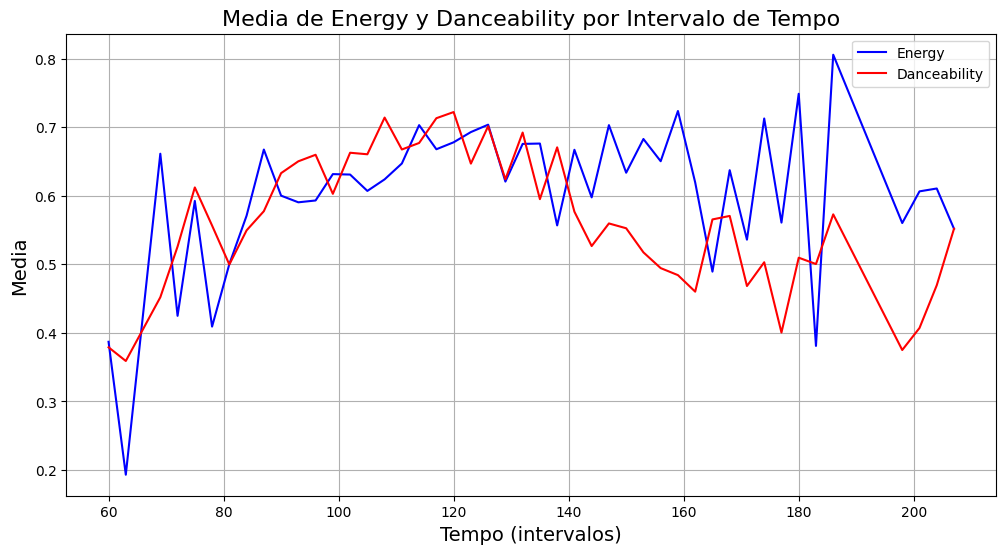

In [45]:
# Agrupar los valores en intervalos  y calcular las medias 
covers_df['Tempo_Range'] = (covers_df['Tempo'] // 3) * 3  

# Calcular la medias para cada intervalo
media_por_tempo_intervalo = covers_df.groupby('Tempo_Range')[['Energy', 'Danceability']].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(media_por_tempo_intervalo.index, media_por_tempo_intervalo['Energy'], label='Energy', color='blue')
plt.plot(media_por_tempo_intervalo.index, media_por_tempo_intervalo['Danceability'], label='Danceability', color='red')

# Agregar etiquetas y título
plt.title('Media de Energy y Danceability por Intervalo de Tempo', fontsize=16)
plt.xlabel('Tempo (intervalos)', fontsize=14)
plt.ylabel('Media', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### CONCLUSION

Si bien hemos encontrados grados altos de significancia, la variabilidad del tempo esta muy alejada de ser explicada por las variables de energy y danceability. Esto sugiere que <span style = "color: yellow">**la hipótesis de que el tempo está determinado por estas dos variables debe ser descartada**</span>, ya que su contribución a la variación del tempo es mínima o nula. Ademas, tanto el grafico de medias como la nula correlacion vista con anterioridad, nos dan un indicio de que tanto afecta estas variables, Aun así, estas variables han confirmado lo que se predecía, es decir, que su influencia sobre el tempo es mínima o nula